<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

> Creating complex-valued Rayleigh initializations for neural networks.  

# Introduction

Most neural networks use real-valued weights instead of complex ones. Real-valued networks include NLP transformers for text, CNNs in Computer Vision for images, and feed-forward networks for audio signals like speech. At initialization, each real-valued weight only needs a single real-valued number. These networks are quite powerful and have been extremely successful in their domains, so why do we need complex-valued weights at all?  


It turns our that many signals are better represented in the complex domain. These complex-valued signals are found in:  

- Robotics  
- Radio Frequency communications  
- Bio-informatics  
- Radar  
- Speech  

That does not mean that we *must* use complex values for these signals. The crucial point is that real-valued networks are potentially throwing away half of the information in the input. 

Moreover, the phase of complex signals contains important information. For example, the phase of an image describes the position of the photo's subjects, while the magnitude mainly has color information. In speech, the phase of a signal is important for how understandable the recording is. In sonar, communications, radar, and robotics the phase embeds information about both the signal's content and its location.  


If we want to leverage the full potential of these complex input signals, we need to match them with complex-valued neural networks. The key difference for complex weights is that we now need need two values: one for phase and the other for magnitude.  

But we cannot simply take two regular, real-valued initializations and call it a day. The rest of this post goes over the details of accurately creating proper initializations for complex-valued weights.

## Complex Numbers: A brief recap

<br>
Complex numbers have two components:  
- A real part.  
- An imaginary part.  

The real component is a regular number like we would find on a plain number line. The imaginary component exists along the `i` axis.    

To keep things simple, we can think of these numbers on a two-dimensional plot. The real number is on the x-axis while the imaginary number is on the y-axis.  

### Starting with a real number

Plotting examples is a great way to make things concrete. We first plot a regular, real number that we are all familiar with: $x = 2$

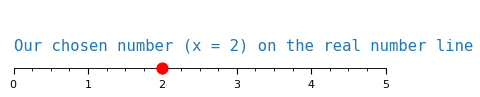

In [ ]:
#|echo: false
#|output: true
import math
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import ticker

def setup(ax, title):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines.right.set_color('none')
    ax.spines.left.set_color('none')
    ax.spines.top.set_color('none')

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 1)
    ax.text(0.0, 0.3, title, transform=ax.transAxes,
            fontsize=14, fontname='Monospace', color='tab:blue')

fig, ax = plt.subplots(figsize=(6,1),dpi=80)
# Scalar formatter
setup(ax, title="Our chosen number (x = 2) on the real number line")
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.scatter(2, 0, marker='o', c='r', s=100, zorder=10, clip_on=False);

### Magnitude of a real number

The distance from the origin to our number tells us its magnitude. With positive values this feels redundant, since the magnitude is always the number itself.  

But what about negative numbers? That is where the absolute value, represented as $|x|$, comes into play. If we had picked $x = -2$ instead, the magnitude would still be the same: $|-2| = |2| = 2$.  

So for any real number, positive or negative, we can find its magnitude by drawing an arrow starting from the origin $0$. The absolute length of the arrow will be the number's magnitude.  

Why are we spelling out this aspect of numbers so much? That will become clear when we introduce the imaginary component next. 

### Adding an imaginary component

We will keep our real component the same: $x = 2$.  

But now, let's an imaginary component: $y = 3$, to turn it into a complex number.  

What does this new complex number look like? We can visualize it on a 2D plot:

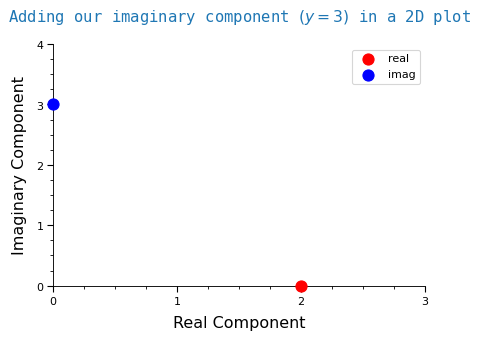

In [ ]:
#|echo: false
#|output: true
def setup_2d(ax):
    """Set up common parameters for the Axes in the example."""
    # only show the bottom spine
    ax.spines.right.set_color('none')
    ax.spines.top.set_color('none')

    # define tick positions
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.25))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 4)
#     ax.text(0.0, 1, title, transform=ax.transAxes,
#             fontsize=14, fontname='Monospace', color='tab:blue')
    
fig, ax = plt.subplots(dpi=80)
# Scalar formatter
x, y = 2, 3
title="Adding our imaginary component $(y = 3)$ in a 2D plot"
setup_2d(ax)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_title(title, fontsize=14, fontname='Monospace', color='tab:blue', pad=20)
ax.set_xlabel('Real Component', fontsize='x-large', labelpad=8)
ax.set_ylabel('Imaginary Component', fontsize='x-large', labelpad=8)
ax.scatter(x, 0, marker='o', label='real', c='r', s=100, zorder=10, clip_on=False)
ax.scatter(0, y, marker='o', label='imag', c='b', s=100, zorder=10, clip_on=False);
ax.legend();

We combined these two components to get a complex number! Let's call this number $z$.  

$z$ will be defined as: $z = x + iy$  

The "$i$" next to a number means that it is the imaginary component.

### Magnitude of a complex number

While we could use the real and imaginary components, there is another representation of complex numbers that will be more useful to us. This other representation is the *magnitude* and *phase* of a complex number.  

Remember how for a real number, its magnitude was the length of an arrow starting from the origin? The same idea applies to complex numbers. With one new detail: we have two components now, so our arrow's length will be different.  
Let's first draw our new complex number as an arrow.

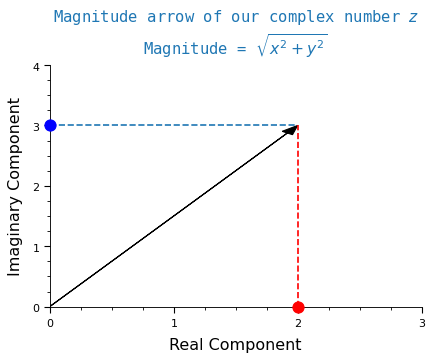

In [ ]:
#|echo: false
#|output: true
fig, ax = plt.subplots(dpi=80)
# Scalar formatter
x, y = 2, 3
mag = math.sqrt(x**2 + y**2)
title="Magnitude arrow of our complex number $z$\nMagnitude = $\sqrt{x^{2} + y^{2}}$"
setup_2d(ax)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_title(title, fontsize=14, fontname='Monospace', color='tab:blue', pad=10)
ax.set_xlabel('Real Component', fontsize='x-large', labelpad=8)
ax.set_ylabel('Imaginary Component', fontsize='x-large', labelpad=8)
ax.scatter(x, 0, marker='o', c='r', s=100, zorder=10, clip_on=False)
ax.scatter(0, y, marker='o', c='b', s=100, zorder=10, clip_on=False);
plt.arrow(0, 0, 2, 3, length_includes_head=True, head_width=0.1, head_length=0.15, color='k', label='Magnitude')
plt.axhline(y, xmin=0, xmax=0.66, linestyle='--')
plt.axvline(x, ymin=0, ymax=0.75, linestyle='--', c='r');

The formula to compute the magnitude of a complex number $z$ is:  
$$|z| = \sqrt{x^{2} + y^{2}}$$

Plugging in our $x$ and $y$ values gives our complex $z$ a magnitude of:  
    
$$|z| = \sqrt{2^{2} + 3^{2}} = \sqrt{4 + 9} = \sqrt{13}$$

While knowing the magnitude is important, it is not enough to fully describe $z$. For example what if instead of $(x = 2, y = 3)$ we had swapped them around as $(x = 3, y = 2)$. If we plug these values into the magnitude equation we get back the exact same number $\sqrt{13}$.  

But looking at our 2D plots, these swapped points would obviously be in different locations. So if we were given only the magnitude, how could we tell that it came from our true, original $z$?   

### Phase: telling complex magnitudes apart from each other

The way to tell two complex numbers with the same magnitude apart lies in the fact that the arrows are no longer flat along the x-axis.   

Instead they are now elevated ("pulled up") by the imaginary component $y = 3$. The complex number now has an *angle* respective to the x-axis.  

This angle, together with a magnitude, is enough to perfectly describe our complex $z$. In other words: we know both how long to make the vector and where to point it.  

Let's complete the picture by including the angle of $z$:

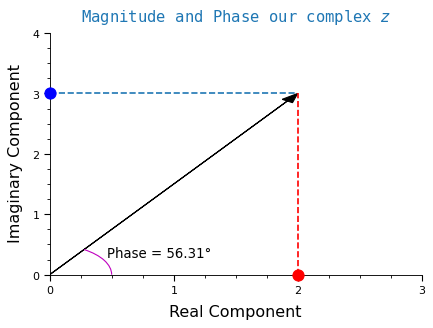

In [ ]:
#|echo: false
#|output: true
# angle plotting code from: https://stackoverflow.com/questions/25227100/best-way-to-plot-an-angle-between-two-lines-in-matplotlib

fig, ax = plt.subplots(dpi=80)
# Scalar formatter
x, y = 2, 3
mag = math.sqrt(x**2 + y**2)
title="Magnitude and Phase our complex $z$"
setup_2d(ax)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.set_title(title, fontsize=14, fontname='Monospace', color='tab:blue', pad=10)
ax.set_xlabel('Real Component', fontsize='x-large', labelpad=8)
ax.set_ylabel('Imaginary Component', fontsize='x-large', labelpad=8)
ax.scatter(x, 0, marker='o', c='r', s=100, zorder=10, clip_on=False)
ax.scatter(0, y, marker='o', c='b', s=100, zorder=10, clip_on=False);
plt.arrow(0, 0, 2, 3, length_includes_head=True, head_width=0.1, head_length=0.15, color='k', label='Magnitude')
plt.axhline(y, xmin=0, xmax=0.66, linestyle='--')
plt.axvline(x, ymin=0, ymax=0.75, linestyle='--', c='r');

origin_angle = 0
phase = abs(math.degrees(math.atan(y / x))) # TOA
len_x_axis, len_y_axis = 1, 1
offset = 1
color = 'm'
arc = matplotlib.patches.Arc(
    [0,0],
    len_x_axis*offset,
    len_y_axis*offset,
    0,
    origin_angle,
    phase,
    color=color,
    label=f'{phase:.2f}'+u"\u00b0"
)
def get_angle_text(angle_plot):
    angle = angle_plot.get_label()[:-1] # Excluding the degree symbol
    angle = f'{angle}'+u"\u00b0" # Display angle upto 2 decimal places

    # Get the vertices of the angle arc
    vertices = angle_plot.get_verts()

    # Get the midpoint of the arc extremes
    x_width = (vertices[0][0] + vertices[-1][0]) / 2.0
    y_width = (vertices[0][1] + vertices[-1][1]) / 2.0

    separation_radius = max(x_width/2.0, y_width/2.0)

    return [x_width + separation_radius, y_width + separation_radius, angle]  

angle_text = get_angle_text(arc)
ax.add_patch(arc)
# ax.text(*angle_text) # To display the angle value
ax.text(0.46, 0.28, f'Phase = {angle_text[-1]}', fontsize='large'); # To display the angle value

We use $\theta$ to represent the angle. The formula to compute $\theta$ is:  
$$\theta = \arctan{\frac{y}{x}}$$

Plugging in $x$ and $y$ for our complex number $z$ gives us an angle of:  

$$\theta = \arctan{\frac{3}{2}} = 56.31 ^\circ$$

With the phase and magnitude, we now have a unique way of representing our complex number $z$.

## Recap: Complex Numbers

In this section, we gave a brief overview of complex numbers and their representation. To make things concrete, we picked a complex number $z$ with a real component $x = 2$ and an imaginary component $y = 3$.   

 Then, we showed that we can perfectly represent this complex number $z$ with two pieces of information: its *magnitude* and its *phase*.  
  
- **Magnitude**: the length of a vector.  
- **Phase**: the angle, or direction, where a vector is pointing.  

# Distributions for complex initializations. 

Now that we know what complex numbers are, how do we pick them to make sure they are good initial weight values?  

## Background on neural network initializations 

While initializations are now taken for granted, they were part of the first key pieces that made it possible to train deep neural networks. Before we knew how to properly initialize networks, training was very unstable as the gradients would either diverge or collapse to 0. This is known as gradient explosion or vanishing, respectively.  

The main insights to prevent gradients from vanishing or exploding came from analyzing their variance during training.  
> **Aside**: this is still an important error analysis tool! Looking at the behavior and distribution of gradients is a surefire way to catch problems with the training. Especially during the earliest optimizer steps.    

### Achieving smooth gradient flows

It was the seminal work by [He](https://arxiv.org/pdf/1502.01852.pdf) and [Glorot, Bengio](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) that showed how to control the variance of gradients to make sure that training was successful. They found that the variance of the sampling distributions, either Normal or Uniform, must meet certain criteria for the gradients to flow "smoothly". 

Here, "smoothly" means that the gradients neither disappear nor explode during training.  

The initializations derived in these papers are now the defaults in popular deep learning libraries like TensorFlow and pytorch.  

Unfortunately, the theory of complex-valued neural networks is not as well established. How can we know what are good variances and distributions for complex weights?  

It turns out we can borrow these hard-earned lessons about good real-valued initializations to make sure that our complex gradients flow smoothly.  

## Initializing complex magnitudes  

Instead of drawing from a Normal or Uniform distribution, like we do for real-valued networks, the magnitudes will instead be drawn from a **[Rayleigh distribution](https://en.wikipedia.org/wiki/Rayleigh_distribution])**. The reasons for this are described below. We can think of a Rayleigh distribution as the complex version of the familiar Normal distribution we use for real-valued weights.  

## Initializing phases

The phases will be drawn from a Uniform distribution. To see why, think about a compass with 360 degrees to choose from.  

We could randomly pick a degree and start walking in that direction for a given amount of time. Assuming we are on a flat surface, each degree choice will place us in a different, unique location. 

Because we don't know which direction our learned complex weights should point in, the best we can do is to start by randomly pointing everywhere and letting the gradients steer the vectors instead.  

# History of Complex Networks

Despite the fact that they are not as popular as real-valued approaches, complex networks have a rich and long history. See Chapter 3 of this thesis on [Complex Networks for Audio](https://digitalcommons.dartmouth.edu/dissertations/55/) by Andy M. Sarroff for a great historical recap.  

The first modern, complete work on complex neural nets was [Deep Complex Networks](https://arxiv.org/pdf/1705.09792.pdf) by Trabelsi et. al. This paper explored many fundamental building blocks for deep complex networks. It developed complex versions of initializations, convolutions, activations, and batch normalizations. It then stacked these blocks together to build complex versions of popular networks like ResNets.    

Despite this fantastic work the field remained somewhat quiet. But! There has been a recent activity spike in exciting fields like medical imaging, radio frequency signal processing, optical networks, and even quantum networks!  

Some of these newer applications and advances are described in this comprehensive [Survey of Complex-Valued Neural Networks](https://arxiv.org/pdf/2101.12249.pdf) by Bassey at. al.  

Now that we know a bit more about Complex Networks, we are finally ready to initialize their weights. Let's start by looking at the Rayleigh distribution to learn more about our complex magnitudes.

# The Rayleigh Distribution  


A Rayleigh distribution happens when two random variables are added together. In order to be Rayleigh distributed, the random variables must be uncorrelated, normally distributed, have zero mean, and share the same standard deviation. Let's make this more concrete with a few examples.  

First, imagine setting up a sensor that measures wind speed out in an open field. If we analyzed the wind speed through this sensor in two directions, say North and East, then the magnitude of the wind's velocity will follow a Rayleigh distribution.  

For another example, imagine tuning your car radio and accidentally ending up at an empty station. Only the familiar crackle of static is audible. This static means that the radio spectrum is empty and all we hear is noise. If we recorded the real and imaginary components of this noise, its magnitude would follow a Rayleigh distribution. In other words, pure RF noise follows a Rayleigh distribution.  
 
## Why Rayleigh?  
Why do we choose the Rayleigh distribution? The reason is that, without having more information about what our complex magnitudes *should* be, it is the best, unbiased starting point for the network.  

In other words, we pick the maximum entropy distribution to avoid a-priori biasing our network toward any particular outcome. One of the successes of Deep Learning has been that it's best to let the learning procedure figure out the values on its own in its higher dimensional activation feature space.  

This is the complex-valued version of the same logic for using Normal or Uniform distribution to initialize real-valued networks. 

## Details of the Rayleigh distribution

Let's dive into the details. The equation below is the Probability Density Function (PDF) of the Rayleigh distribution.

$$f(x,\sigma) = \frac{x}{\sigma^2}e^{-x^2/(2\sigma^2)}, \ \ x \geq 0$$

This equation is a bit intimidating in written form. Let's instead code it up as a python function with NumPy to make it cleaner. 

In [ ]:
# start by importing the libraries we need
import matplotlib.pyplot as plt
import numpy as np
import torch
from numpy.random import default_rng
import warnings
warnings.filterwarnings("ignore")

# define the Rayleigh PDF
def rayleigh_pdf(x, sigma):
    "Evaluates the Rayleigh PDF at a given point `x`."
    p = (x / sigma**2) * np.exp(-x**2 / (2*sigma**2)) # see if you can match this code to the equation above
    return p

The parameter sigma $(\sigma)$ is known as the distribution's scale. It is commonly found in many probability distributions and often controls how spread out or narrow a distribution is.

Let us start by setting $\sigma = 1$ to draw the "basic" Rayleigh shape. We will then change sigma to see how this affects the distribution's shape.

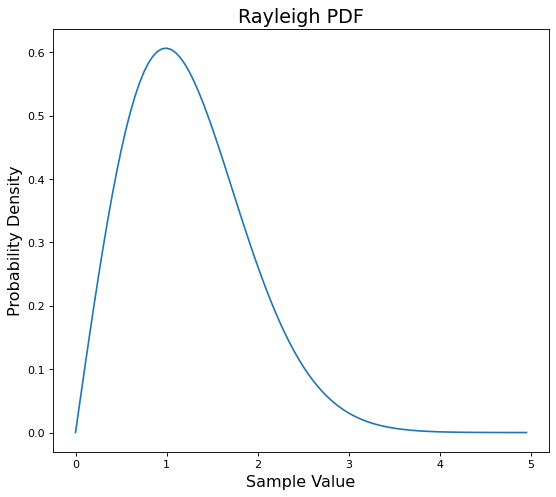

In [ ]:
# start with sigma of one as the base case
sigma = 1

# calculate the Rayleigh PDF on 100 equally spaced points between 0 and 5
points = np.linspace(0, 5, 100)
ray_pdf = rayleigh_pdf(points, sigma)  

# setup the plot
fig, ax = plt.subplots(figsize=(8,7), dpi=80)
ax.set_xticklabels([-1] + list(range(len(ax.get_xticklabels()))))
ax.set_xlabel('Sample Value', fontsize='x-large')
ax.set_ylabel('Probability Density', fontsize='x-large')
ax.set_title('Rayleigh PDF', fontsize='xx-large');

# plot the Rayleigh pdf
ax.plot(ray_pdf);

As we mentioned the scale $\sigma$ controls the width or narrowness of the distribution.  
Let's both halve and double sigma to ($\frac{1}{2}, {2})$ respectively to see what happens.

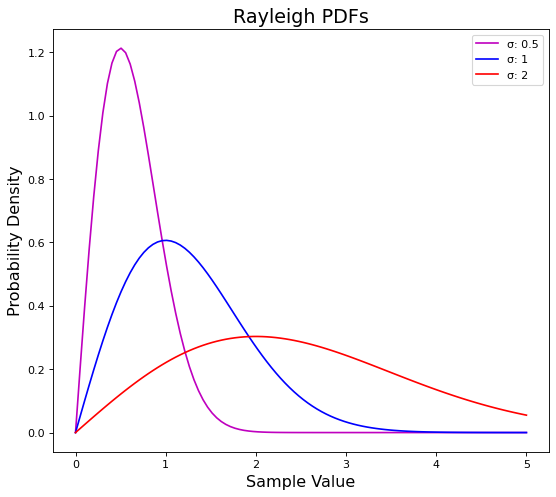

In [ ]:
# setup plot
fig,ax = plt.subplots(figsize=(8,7), dpi=80)
ax.set_xlabel('Sample Value', fontsize='x-large')
ax.set_ylabel('Probability Density', fontsize='x-large')
ax.set_title('Rayleigh PDFs', fontsize='xx-large'); 


# different colors for each sigma
sigmas = [0.5, 1, 2]
colors = ['m', 'b', 'r']

# plot the distributions with different scales
for color,sig in zip(colors,sigmas):
    rpdf = rayleigh_pdf(points, sig)
    ax.plot(points, rpdf, c=color, label=f'σ: {sig}')
ax.set_xticklabels([-1] + list(range(len(ax.get_xticklabels()))))
ax.legend();

The blue line in the plot above is the same PDF from our first plot where $\sigma = 1$.  

We can see how $(\sigma = 0.5)$ pulls the distribution up and to the left, while $(\sigma = 2)$ squishes it down and to the right.  

In other words, a smaller sigma makes our distribution narrower while a larger sigma makes it wider.

Plotting the theoretical Rayleigh PDF only shows what the distribution *should* looks like. Next, we need to actually generate some Rayleigh values.

# Generating Rayleigh samples

We use the [default_rng](https://numpy.org/doc/stable/reference/random/generator.html) class in numpy to draw Rayleigh samples. `default_rng` is a helpful class that can sample from just about every known distribution.

First we create the `default_rng` class with an arbitrary seed of $0$.

In [ ]:
seed = 0
rand = default_rng(seed)

This `default_rng` instance can now sample directly from a Rayleigh distribution. We can use the sampling function `default_rng.rayleigh` which accepts two parameters:  
- `scale`: $\sigma$ with a default value of 1.  
- `size`: the shape of the output array  

Let's start by drawing 1,000 Rayleigh samples with $\sigma = 1$. 

In [ ]:
sigma = 1
shape = 1000
# one dimensional vector with 1000 samples
ray_vals = rand.rayleigh(scale=sigma, size=shape)

How can we check check if these samples are actually Rayleigh distributed? We can compare these values to the plots of the theoretical Rayleigh PDF from the previous section. 

The easiest way to compare the samples is with a histogram.

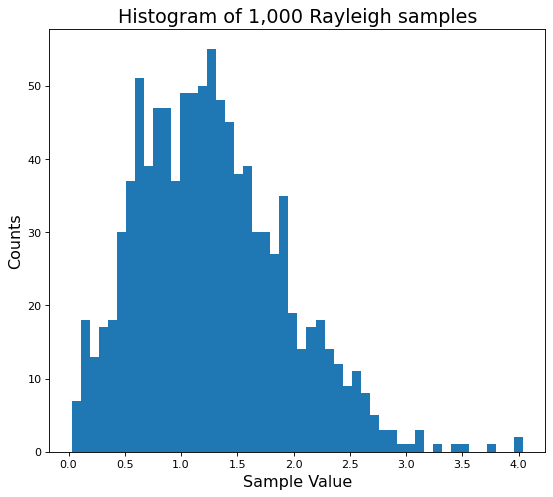

In [ ]:
# setup the histogram plot for our drawn samples
plt.figure(figsize=(8,7), dpi=80)
plt.xlabel('Sample Value', fontsize='x-large')
plt.ylabel('Counts', fontsize='x-large')
plt.title(f'Histogram of {shape:,} Rayleigh samples', fontsize='xx-large')

# plot the histogram of 1000 Rayleigh samples
plt.hist(ray_vals, bins=50);

This is an ok start. If we squint, we can almost see the Rayleigh PDF shape we plotted earlier. But $1,000$ is a small number of samples.    

As we draw more samples, the distribution should grow closer and closer to the theoretical PDF plots. Let's make sure this happens by now drawing $10,000$ samples.

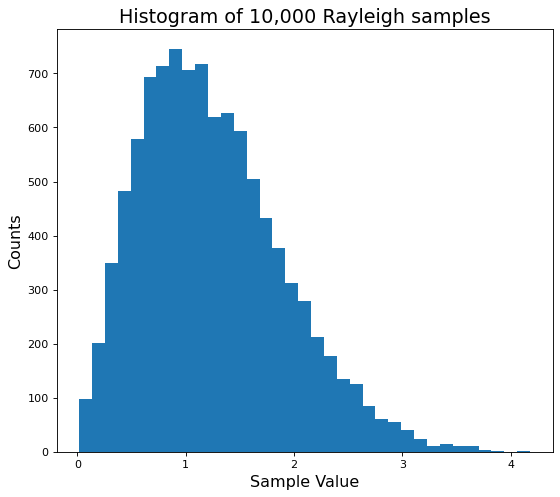

In [ ]:
# setup the new plot with more samples
plt.figure(figsize=(8,7), dpi=80)
plt.xlabel('Sample Value', fontsize='x-large')
plt.ylabel('Counts', fontsize='x-large')

# plot even more Rayleigh samples
large_shape = 10000
plt.title(f'Histogram of {large_shape:,} Rayleigh samples', fontsize='xx-large')
many_ray_vals = rand.rayleigh(scale=sigma, size=large_shape)
plt.hist(many_ray_vals, bins=35);

This looks much better! Now we can compare this histogram to the theoretical Rayleigh PDF.  

> Note that we pass `density=True` to the histogram function to normalize it and make it an approximate PDF.

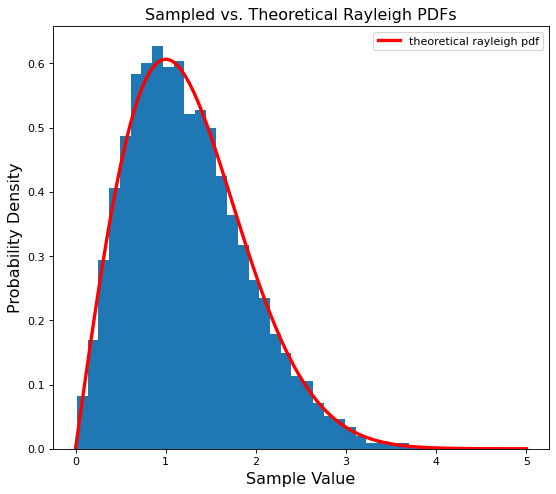

In [ ]:
# setup the plot again
plt.figure(figsize=(8,7), dpi=80)
plt.title('Sampled vs. Theoretical Rayleigh PDFs', fontsize='x-large')
plt.xlabel('Sample Value', fontsize='x-large')
plt.ylabel('Probability Density', fontsize='x-large')

# compare the sample and theoretical PDFs of the Rayleigh distribution
plt.hist(many_ray_vals, density=True, bins=35) # makes the histogram sum to one to mimic a pdf
plt.plot(points, ray_pdf, c='r', label='theoretical rayleigh pdf', linewidth=3)
plt.legend();

A near perfect match! Now we can successfully generate our initial complex Rayleigh magnitudes.  

We are ready to move on to the phase.

# Sampling phase initializations

The Rayleigh values from the previous section tell us the magnitude, or length, of our complex weights. But that is only one part of a complex number. We are still missing the angle, or phase, that these complex numbers are pointing in.  

For the phase, is enough to use random, uniform angles. Why can we do this here, when we went to such care to get the correct magnitude values?   

It turns out that many processes such as speech, medical images, and radio modulations encode information in the signal's phase. But we don't know what this phase should look like beforehand. And we don't want to bias the networks to any particular phase orientation.  

Instead, by uniformly picking random starting phases it is like we are pointing in every direction, roughly equally. Tying it back to our compass example from earlier. It's as if we told each weight to random pick a degree and start walking in that direction.  

Then, during training, the network will learn how to best orient the weights for its given task. 

Sampling this random uniform phase is straightforward. We pick uniform samples from $-\pi$ to $\pi$ radians which maps to a full loop of the unit circle. Even better, we can also reuse the same `default_rng` from before!

In [ ]:
# pick random directions along the unit circle
phase = rand.uniform(low=-np.pi, high=np.pi, size=ray_vals.shape)

## (Magnitude, Phase) vs. (Real, Imaginary)

We mentioned earlier that a complex number has real and imaginary components. But so far we have deal with magnitudes and phases instead. How are these quantities related?  

It turns out that we can use the phase and magnitude to split our vector into its real and imaginary parts. The cosine of the phase and magnitude gives us the real part, and the sine of the phase gives us the imaginary part.  

These are two different representations of the same complex number. We do not lose anything going from one to the other or vice-versa.

In [ ]:
# splitting our phases and magnitues into real and imaginary components
real = ray_vals * np.cos(phase)
imag = ray_vals * np.sin(phase)

It turns out this will be a key detail when we are creating complex-valued network layers. As a preview: we will give one set of weights the `real` values, and another set of weights the `imag` values. This is because complex operations like addition and multiplication work better on GPUs with real and imaginary representations.

## Visualizing our random phases

Now we can check if these phases are truly orienting our magnitudes in random directions. To do so we plot the first 500 complex weights in the polar plane.

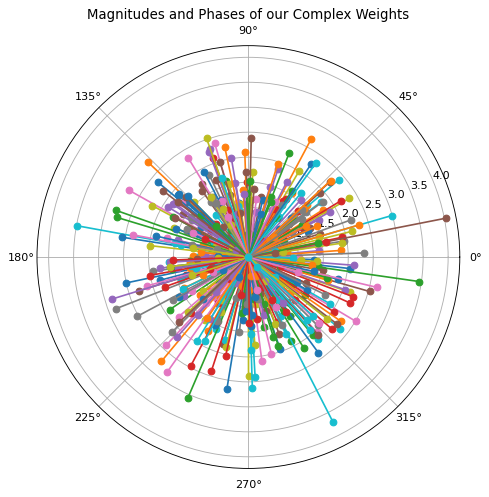

In [ ]:
# indexes for the first 500 random weights
chosen_samples = range(500) 

# plot these first complex weights
plt.figure(figsize=(8,7), dpi=80)
for idx in chosen_samples:

    # index into phase and magnitude variables
    angle,mag = phase[idx],ray_vals[idx]

    # plot them starting from the origin
    plt.polar([0,angle], [0,mag], marker='o')
    
plt.title('Magnitudes and Phases of our Complex Weights');

That definitely looks like a random, uniform orientation!   

# Recapping Phase and Magnitude so far

To recap we now have:  
- Magnitude initializations drawn from a Rayleigh distribution.  
- Phase initializations drawn from a Uniform distribution.   

Putting these together, we have complex-valued numbers pointing roughly in all directions.  

We are almost there. There is one more important detail to work out: the variance of our complex weights.

# Matching He and Glorot variance criteria

Even though we now have random complex weights, they are not yet good initializations. The polar plot above gives some clues as to why.  
> hint: look at the range of the vector's magnitudes.  

Remember from the background section on initializations: the key insight was that the variance of the distributions need to follow certain criteria. This variance criteria makes sure that the gradients flow well during backpropagation.  

To be more specific, both the He and Glorot criteria are based on the incoming and outgoing connections of a network layer. This number of connections is typically called `fanIn` and `fanOut`, respectively.  

The He criteria says that the variance of weights $W$ should be: $$\text{Var}(W) = \frac{2}{\text{fanIn}}$$

The Glorot criteria says that the variance should be: $$\text{Var}(W) = \frac{2}{\text{fanIn + fanOut}}$$

Deep Neural Networks can easily have thousands or even millions of connections. Looking at the criteria equations above, that means that we need very small variances since `fanIn` and `fanOut` will be large.  

Now we can see why our weights so far, shown in the earlier polar plot, are not good: their variance is clearly too large!

## He and Glorot criteria for Rayleigh distributions

How can we make sure our Rayleigh magnitudes meet the He and Glorot variance criteria?  
The [Complex Neural Nets paper](https://arxiv.org/pdf/1705.09792.pdf) from earlier includes a nice derivation for the variance of a complex Rayleigh distribution: $$\text{Var}(W) = 2\sigma^{2}$$   

We can set the Rayleigh variance equal to the He and Glorot criteria and solve for sigma $\sigma$.

To meet the He criteria, sigma should be: $$\sigma_{\text{He}} = \frac{1}{\sqrt{\text{fanIn}}}$$ <br>

To meet the Glorot criteria, sigma should be: $$\sigma_{\text{Glorot}} = \frac{1}{\sqrt{\text{fanIn + fanOut}}}$$ <br>

### Starting with a simple one-layer network

In the previous sections we used a flat vector of complex weights for the examples and plots. Tying it back at our two concrete examples of wind speed and radio noise, it's as if we took a single series of measurements.  

But since the He and Glorot criteria are defined for network layers, we need a new example. Let's start with to a simple one-layer network. Our layer will have 100 inputs and 50 outputs (`fanIn` = 100, `fanOut` = 50).

Plugging these `fanIn` and `fanOut` values into the Rayleigh sigma criteria gives:
$$\sigma_{\text{He}} = \frac{1}{10}$$

$$\sigma_{\text{Glorot}} = \frac{1}{5\sqrt{6}}$$

Now we can pass either of these sigmas to our `default_rng` and it will draw Rayleigh samples with variances that match the chosen criteria.

> A quick word about `fanIn` and `fanOut`. We saw the simple feed-forward case with in our example for a single network layer. In that case the number of incoming connections was simply `fanIn` and the outgoing connections were `fanOut`.  

> However, the convolutional case is a bit more complicated. A convolutional layer has input and output feature maps which are roughly analogous to input and output units in feed-forward layers. But they also have a kernel size to consider. PyTorch has a nice [convenience function](https://pytorch.org/docs/stable/_modules/torch/nn/init.html#_calculate_fan_in_and_fan_out) that handles this for us. 

# Putting it all together: A complex-valued PyTorch initializer

Here is a recap of the previous sections:
1. We first saw a brief overview of complex numbers.  
2. We learned about the history of good initializations and Complex Networks.  
3. We analyzed the theoretical Rayleigh distribution.  
1. We drew some Rayleigh magnitudes to learn more about the distribution.  
2. We picked a random uniform phase, and saw how this orients our vectors in all directions.  
3. We matched our Rayleigh samples to the He and Glorot variance criteria for a single network layer.  

To get usable initializations, we need a function that glues the important pieces together:
- Draw random phase samples.  
- Draw Rayleigh magnitude samples.  
- Match the He or Glorot variance criteria.     
- Are PyTorch tensors with the correct shape for a given network layer.  

We can refactor the earlier code into a function that does just this.  

In [ ]:
def get_complex_inits(module, seed=None, criterion='he', dtype='float32'):
    """Initializes complex-valued Rayleigh weights as PyTorch tensors.
    """
    # random number generator
    rand = default_rng(seed if seed is None else torch.initial_seed())
    
    # get shape of the weights
    weight_shape = module.weight.size()
    
    # find the number of input and output connection
    fan_in, fan_out = torch.nn.init._calculate_fan_in_and_fan_out(module.weight)
    
    # compute the Rayleigh sigma that meets the chosen variance criteria
    assert criterion in ('he','glorot')
    factor = fan_in if criterion == 'he' else fan_in + fan_out
    sigma = 1. / np.sqrt(factor)
    
    # draw the scaled rayleigh magnitudes
    magnitude = rand.rayleigh(scale=sigma, size=weight_shape)
    # draw uniform angle samples
    phase = rand.uniform(low=-np.pi, high=np.pi, size=magnitude.shape)
    
    # split magnitudes into real and imaginary components
    real = (magnitude * np.cos(phase)).astype(dtype)
    imag = (magnitude * np.sin(phase)).astype(dtype)
    
    # turn into float tensors and return
    real,imag = map(torch.from_numpy, [real,imag])
    return real,imag

Let's use this function to get complex weight initializations for a Linear and Convolutional module.

## Complex initializations for `nn.Linear`

In [ ]:
# re-create out earlier example with a single layer
fan_in, fan_out = 100, 50
sigma_he = 1. / np.sqrt(fan_in) # to match the He criteria

# get the complex-valued weights
m = torch.nn.Linear(fan_in, fan_out)
real, imag = get_complex_inits(m)

We should check that the magnitude of the weights actually follow a Rayleigh distribution.  

In [ ]:
# get linear magnitudes as a flat numpy vector
magnitude = torch.sqrt(real**2 + imag**2).numpy().reshape(-1)

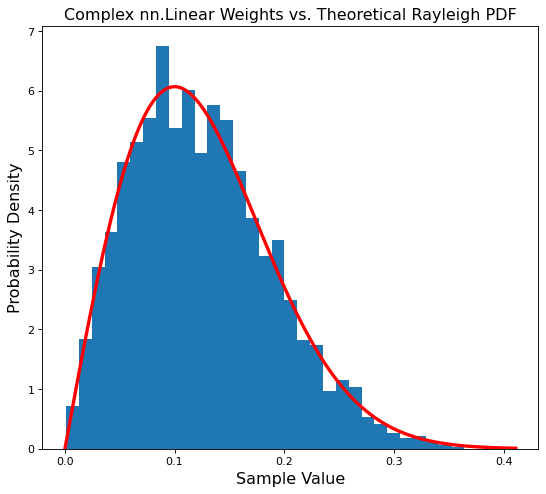

In [ ]:
# setup the plot
plt.figure(figsize=(8,7), dpi=80)
plt.title('Complex nn.Linear Weights vs. Theoretical Rayleigh PDF', fontsize='x-large')
plt.xlabel('Sample Value', fontsize='x-large')
plt.ylabel('Probability Density', fontsize='x-large')

# pick points that cover the sample range to compare with theoretical rayleigh pdf
points = np.linspace(0, magnitude.max(), 1000)
ray_pdf = rayleigh_pdf(points, sigma=sigma_he)

# plot histogram of Linear magnitudes vs. the theoretical pdf
plt.hist(magnitude, bins=35, density=True)
plt.plot(points, ray_pdf, c='r', linewidth=3);

Success! Our Linear module is properly initialized. 

## Complex initializations for `nn.Conv2d`

Can we do the same for a convolutional layer? Our main concern is correctly handling both the tensor shape and `fan_in`, `fan_out`.

In [ ]:
# make conv layer with 100 input features, 50 output features, and (3x3) kernel
k = 3 # kernel size
# now, these are the number of feature maps (chan_in and chan_out)
fan_in, fan_out = 100, 50

conv_layer = torch.nn.Conv2d(fan_in, fan_out, k)
real_conv, imag_conv = get_complex_inits(conv_layer) # get the initial complex weights

# make sure the shape of weights is ok
print(f'Shapes of real and imaginary convolutional tensors: {real_conv.shape}, {imag_conv.shape}')

Shapes of real and imaginary convolutional tensors: torch.Size([50, 100, 3, 3]), torch.Size([50, 100, 3, 3])


Let's check if these convolutional weights are still Rayleigh distributed.

In [ ]:
# get convolutional magnitudes as a flat numpy vector
conv_magnitude = torch.sqrt(real_conv**2 + imag_conv**2).numpy().reshape(-1)

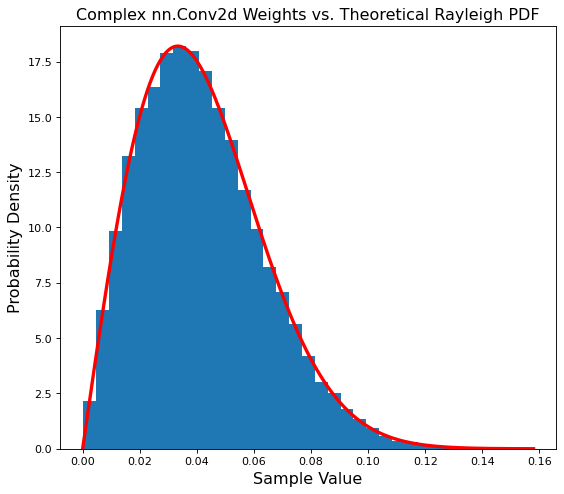

In [ ]:
# setup the plots
plt.figure(figsize=(8,7), dpi=80)
plt.title('Complex nn.Conv2d Weights vs. Theoretical Rayleigh PDF', fontsize='x-large')
plt.xlabel('Sample Value', fontsize='x-large')
plt.ylabel('Probability Density', fontsize='x-large')


# pick points that cover sample range to compare with theoretical rayleigh pdf
points = np.linspace(0, conv_magnitude.max(), 1000)

# note: we need to re-compute fanIn for the convolutional layer
fan_in, fan_out = torch.nn.init._calculate_fan_in_and_fan_out(conv_layer.weight)
sigma_he_conv = sigma=1. / np.sqrt(fan_in)

ray_pdf = rayleigh_pdf(points, sigma_he_conv)

# plot histogram of magnitudes vs. theoretical pdf
plt.hist(conv_magnitude, bins=35, density=True)
plt.plot(points, ray_pdf, c='r', linewidth=3);

Another match! Our convolutional layer is also properly initialized.  

# Conclusion

In this post we created Rayleigh initializations for complex-valued neural networks.  

We started with an overview of complex numbers and weight initializations. Next we moved on to the history of Complex Networks and the Rayleigh distribution.  

Then we used the Rayleigh distribution to sample the magnitudes of complex-valued weights. We then added uniform phase information to randomly orient the vectors. After that, we made sure that the variance of our complex weights made them good initial values.  

Finally, we put all everything together into a python function that return complex initialization tensors. This initialization function will be the first building block of complex-valued neural networks.